In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from tensorflow.keras.models import load_model
import numpy as np

In [2]:
Tk().withdraw()

file_path = askopenfilename(
    title='이미지 파일을 선택하세요',
    filetypes=[('Image Files', '*.png;*.jpg;*.jpeg')]
)

print("선택한 파일:", file_path)

선택한 파일: C:/Users/User/Desktop/7-1.png


In [3]:
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [4]:
image = cv2.resize(image, (28, 28))
image.shape

(28, 28)

In [5]:
image

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        254, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        254, 255],
       [255, 255, 255, 255, 255, 255,  65, 198, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        254, 255],
       [255, 255, 255, 255, 255, 255,  41,  18,  57,  50,  50,  57,  48,
         58,  42,  53,  41,  41,  44,  43,  40,  26, 255, 255, 255, 255,
        254, 255],
       [255, 255, 255, 255, 255, 255,  40,  11,  76,  71,  70,  76,  68,
         77,  62,  72,  61,  61,  64,  63,  29,  15, 255, 255, 255, 255,
        254, 255],
       [255, 255, 255, 255, 255, 255,  40,  30, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255,  32,  18, 255, 255, 255, 255,
        254, 255],
       [25

In [6]:
image = 255 - image
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0],
       [  0,   0,   0,   0,   0,   0, 190,  57,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0],
       [  0,   0,   0,   0,   0,   0, 214, 237, 198, 205, 205, 198, 207,
        197, 213, 202, 214, 214, 211, 212, 215, 229,   0,   0,   0,   0,
          1,   0],
       [  0,   0,   0,   0,   0,   0, 215, 244, 179, 184, 185, 179, 187,
        178, 193, 183, 194, 194, 191, 192, 226, 240,   0,   0,   0,   0,
          1,   0],
       [  0,   0,   0,   0,   0,   0, 215, 225,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 223, 237,   0,   0,   0,   0,
          1,   0],
       [  

In [7]:
image = image / 255.0
image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.74509804, 0.22352941, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
image_max = image.max()
image_max

1.0

In [9]:
image_min = image.min()
image_min

0.0

In [10]:
image = (image - image_min) / (image_max - image_min)
image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.74509804, 0.22352941, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
mean_brightness = image.mean()
mean_brightness

0.09060624249699879

In [12]:
invert = mean_brightness > 0.5
invert

False

In [13]:
if invert:
    print("배경 1 숫자 0 감지 → 반전 수행")
    image = 1.0 - image
else:
    print("MNIST 스타일 (배경 0 숫자 1) → 그대로 사용")

MNIST 스타일 (배경 0 숫자 1) → 그대로 사용


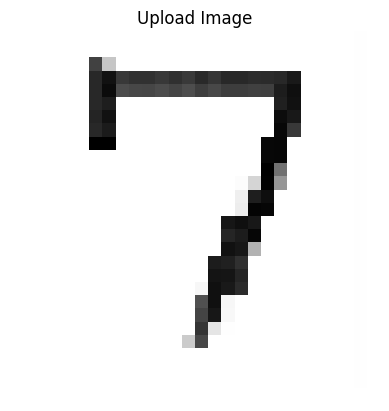

In [14]:
plt.imshow(image.squeeze(), cmap='gray_r')
plt.title("Upload Image")
plt.axis('off')
plt.show()

In [15]:
model = load_model('best_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0

In [16]:
image_input = image.reshape(1, 784)
prediction = model.predict(image_input)
prediction

1/1 [==============================] - 0s 123ms/step


array([[3.3854870e-03, 4.5940317e-02, 4.1403833e-01, 2.1555913e-03,
        5.6735314e-03, 3.7190528e-04, 3.2075911e-03, 5.2459735e-01,
        2.3047406e-04, 3.9939280e-04]], dtype=float32)

In [17]:
predicted_class = np.argmax(prediction)
print(f"\n예측된 숫자: {predicted_class}")


예측된 숫자: 7


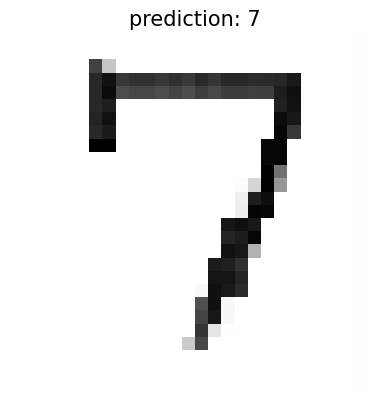

In [18]:
plt.imshow(image.squeeze(), cmap='gray_r')
plt.title(f"prediction: {predicted_class}", fontsize=15)
plt.axis('off')
plt.show()